# Лабораторная работа 2
## Деревья решений

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
X, Y = make_classification(n_samples=500, n_features=3, 
                           n_informative=3, n_classes=5, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=12)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, random_state=0)

In [7]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, Y_train)

In [10]:
Y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.71


In [11]:
def plot_3d_results(X_test, predictions):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for idx in range(len(X_test)):
        point = X_test[idx]
        color = ''
        if predictions[idx] == 0:
            color = '#ff7f0e'
        elif predictions[idx] == 1:
            color = '#2ca02c'
        elif predictions[idx] == 2:
            color = '#d62728'
        elif predictions[idx] == 3:
            color = '#9467bd'
        elif predictions[idx] == 4:
            color = '#8c564b'

        ax.scatter(point[0], point[1], point[2], c = color)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

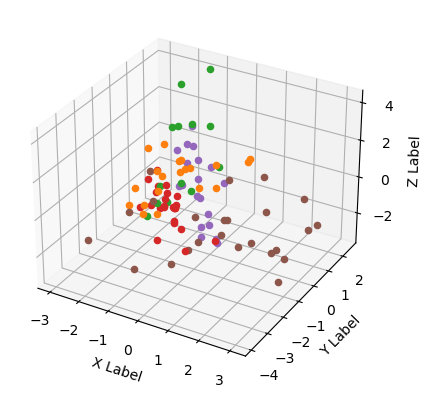

In [13]:
#Тестовые данные
plot_3d_results(X_test, Y_test)

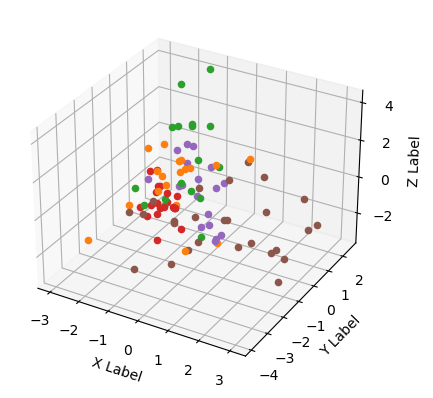

In [12]:
#Предсказания

plot_3d_results(X_test, Y_pred)

# Лабораторная работа 3

## Случайный лес

In [37]:
dataset = sklearn.datasets.load_wine()
data, labels = dataset['data'], dataset['target']

In [38]:
print(data.shape)

(178, 13)


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, random_state=0)

### Зависимость качества классификации от числа деревьев

In [46]:
scores = []
n_estimators = range(1, 30)

for i in n_estimators:
    clf = RandomForestClassifier(max_depth = 20, random_state=0, n_estimators=i)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))

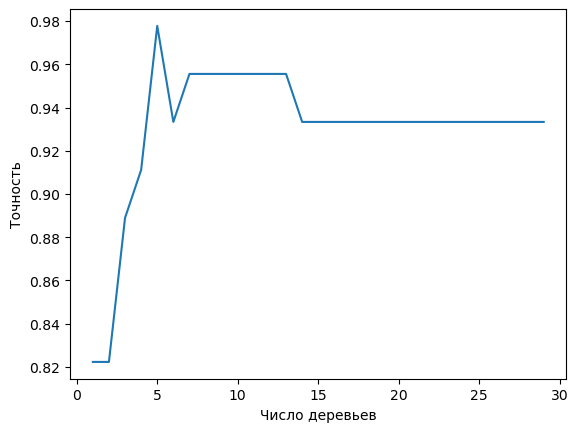

In [47]:
plt.plot(n_estimators, scores)
plt.xlabel('Число деревьев')
plt.ylabel('Точность')
plt.show()

### Зависимость качества обучения от глубины деревьев

In [49]:
scores = []
n_depths = range(2, 30)

In [50]:
for i in n_depths:
    clf = RandomForestClassifier(max_depth = i, random_state=0)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))

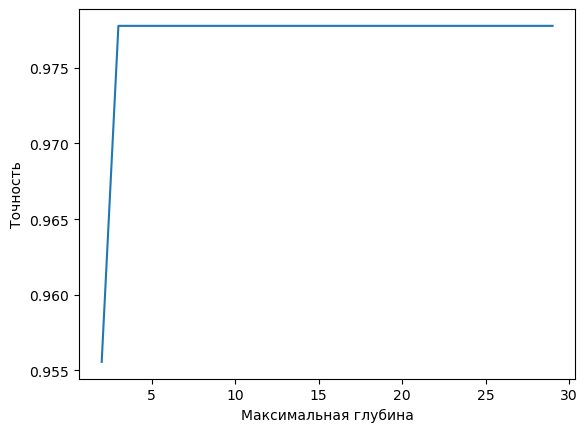

In [51]:
plt.plot(n_depths, scores)
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность')
plt.show()